In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:

df_cancer = pd.read_csv("data/lusc-rsem-fpkm-tcga-t_paired.txt", sep="\t")
df_healthy= pd.read_csv("data/lusc-rsem-fpkm-tcga_paired.txt", sep="\t")

df_cancer

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19644,RP1-66C13.4,0,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,...,0.00,31.00,1.83,0.00,3.32,5.73,0.00,3.03,0.00,0.00
19645,C3orf79,152118,2.27,1.66,0.00,1.22,0.00,0.00,0.00,0.00,...,0.00,5.50,0.00,0.00,0.00,2.86,0.00,1.04,1.50,0.00
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


In [3]:
df_cancer['average_GE']=df_cancer.iloc[:,2:].mean(axis=1)
df_healthy['average_GE']=df_healthy.iloc[:,2:].mean(axis=1)

df_cancer['average_GE']

0        286.4534
1        187.4482
2        490.3438
3         14.0076
4        138.4650
           ...   
19643    203.5698
19644      1.5276
19645      0.5516
19646     11.5644
19647    231.5940
Name: average_GE, Length: 19648, dtype: float64

In [4]:
df_healthy['average_GE']

0         53.6660
1        171.9386
2        866.3358
3         41.5340
4        167.0196
           ...   
19643    512.2180
19644      1.3122
19645      0.2310
19646      1.9818
19647     50.2584
Name: average_GE, Length: 19648, dtype: float64

In [5]:
FC = pd.DataFrame()
FC['Hugo_Symbol'] = df_cancer['Hugo_Symbol']
FC['Entrez_Gene_Id'] = df_cancer['Entrez_Gene_Id']
FC

,Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
1,LIN7B,64130
2,LXN,56925
3,CNKSR2,22866
4,SCML1,6322
...,...,...
19643,HAVCR2,84868
19644,RP1-66C13.4,0
19645,C3orf79,152118
19646,CTD-2116N17.1,0


In [6]:
FC['FC']=df_cancer['average_GE']/df_healthy['average_GE']
FC

,Hugo_Symbol,Entrez_Gene_Id,FC
0,HIST3H2A,92815,5.337707
1,LIN7B,64130,1.090204
2,LXN,56925,0.565997
3,CNKSR2,22866,0.337256
4,SCML1,6322,0.829034
...,...,...,...
19643,HAVCR2,84868,0.397428
19644,RP1-66C13.4,0,1.164152
19645,C3orf79,152118,2.387879
19646,CTD-2116N17.1,0,5.835301


In [7]:
FC['log2FC']=np.log2(FC['FC'])
FC

/home/fatmaosama/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC
0,HIST3H2A,92815,5.337707,2.416220
1,LIN7B,64130,1.090204,0.124599
2,LXN,56925,0.565997,-0.821133
3,CNKSR2,22866,0.337256,-1.568083
4,SCML1,6322,0.829034,-0.270496
...,...,...,...,...
19643,HAVCR2,84868,0.397428,-1.331234
19644,RP1-66C13.4,0,1.164152,0.219279
19645,C3orf79,152118,2.387879,1.255730
19646,CTD-2116N17.1,0,5.835301,2.544807


In [8]:
FC['ABS']=FC['log2FC'].abs()
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS
0,HIST3H2A,92815,5.337707,2.416220,2.416220
1,LIN7B,64130,1.090204,0.124599,0.124599
2,LXN,56925,0.565997,-0.821133,0.821133
3,CNKSR2,22866,0.337256,-1.568083,1.568083
4,SCML1,6322,0.829034,-0.270496,0.270496
...,...,...,...,...,...
19643,HAVCR2,84868,0.397428,-1.331234,1.331234
19644,RP1-66C13.4,0,1.164152,0.219279,0.219279
19645,C3orf79,152118,2.387879,1.255730,1.255730
19646,CTD-2116N17.1,0,5.835301,2.544807,2.544807


In [9]:
Threshold=math.log(1.5,2)
Threshold

0.5849625007211562

In [10]:
FC.loc[FC['ABS'] < Threshold, 'over  expressed'] = 0 
FC.loc[FC['ABS'] >= Threshold, 'over  expressed'] = 1
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,over expressed
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0
2,LXN,56925,0.565997,-0.821133,0.821133,1.0
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0
...,...,...,...,...,...,...
19643,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0
19644,RP1-66C13.4,0,1.164152,0.219279,0.219279,0.0
19645,C3orf79,152118,2.387879,1.255730,1.255730,1.0
19646,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0


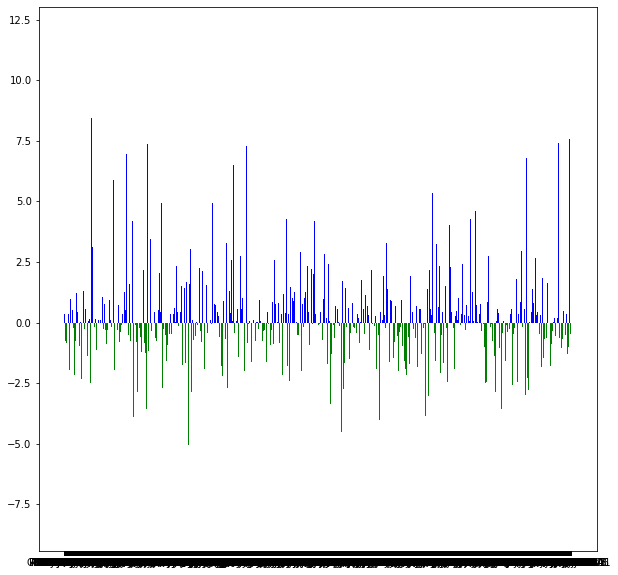

In [34]:
cc=['r']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='g'
    elif val>=0:
        cc[n]='b'

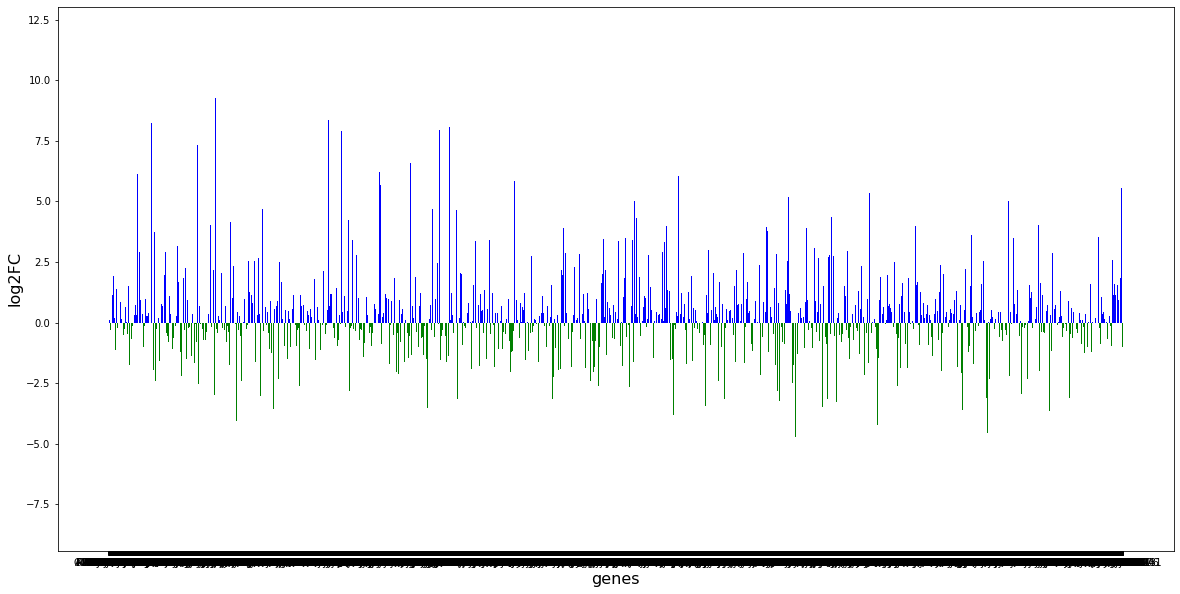

In [37]:
plt.figure(figsize=(20,10))
plt.bar(FC["Hugo_Symbol"],FC['log2FC'],color=cc)
plt.xlabel('genes', fontsize=16)
plt.ylabel('log2FC', fontsize=16)

plt.show()

19648